In [1]:
import sklearn  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import get_scorer_names
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import r2_score, mean_squared_error
import plotly.graph_objects as go
import holidays
from sklearn.feature_selection import RFE
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib
from sklearn.feature_selection import RFE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
#import shap
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

### function to prepare data for ML model

In [2]:
# Remove timezone information from the DateTime column
def remove_timezone(dataset):
    dataset['DateTime'] = pd.to_datetime(dataset['DateTime'], utc=True)
    dataset['DateTime'] = dataset['DateTime'].dt.tz_localize(None)
    return dataset

In [3]:
def weekend(dataset):
    dataset.loc[:,'day_of_week'] = dataset['DateTime'].dt.weekday
    dataset.loc[:,'hour'] = dataset['DateTime'].dt.hour
    return dataset

In [4]:
def one_hot_encoding(dataset):
    dataset = pd.get_dummies(dataset, columns=['day_of_week'], prefix='day_of_week', dtype=float)
    dataset = pd.get_dummies(dataset, columns=['hour'], prefix='hour', dtype=float)
    return dataset

In [5]:
def price_lags(dataset):
    dataset['Electricity Price Lag_1_day'] = dataset['Electricity_price'].shift(24)  
    dataset['Electricity Price Lag_2_days'] = dataset['Electricity_price'].shift(48)
    dataset['Electricity Price Lag_7_days'] = dataset['Electricity_price'].shift(168)
    return dataset

In [6]:
def demand_lags(dataset):
    dataset['Demand_Lag_1_day'] = dataset['Wind'].shift(24)  
    dataset['Demand_Lag_2_days'] = dataset['Wind'].shift(48)
    dataset['Demand_Lag_7_days'] = dataset['Wind'].shift(168)
    return dataset

In [7]:
def wind_lags(dataset):
    dataset['Wind_Lag_1_day'] = dataset['Wind'].shift(24)  
    dataset['Wind_Lag_2_days'] = dataset['Wind'].shift(48)
    dataset['Wind_Lag_7_days'] = dataset['Wind'].shift(168)
    return dataset

In [8]:
def nuclear_lags(dataset):
    dataset['Nuclear_Lag_1_day'] = dataset['Nuclear'].shift(24)  
    dataset['Nuclear_Lag_2_days'] = dataset['Nuclear'].shift(48)
    dataset['Nuclear_Lag_7_days'] = dataset['Nuclear'].shift(168)
    return dataset

In [9]:
def solarthermal_lags(dataset):
    dataset['SolarThermal_Lag_1_day'] = dataset['SolarThermal'].shift(24)  
    dataset['SolarThermal_Lag_2_days'] = dataset['SolarThermal'].shift(48)
    dataset['SolarThermal_Lag_7_days'] = dataset['SolarThermal'].shift(168)
    return dataset

In [10]:
def coal_lags(dataset):
    dataset['Coal_Lag_1_day'] = dataset['Coal'].shift(24)  
    dataset['Coal_Lag_2_days'] = dataset['Coal'].shift(48)
    dataset['Coal_Lag_7_days'] = dataset['Coal'].shift(168)
    return dataset

In [11]:
def hydro_lags(dataset):
    dataset['Hydro_Lag_1_day'] = dataset['Hydro'].shift(24)  
    dataset['Hydro_Lag_2_days'] = dataset['Hydro'].shift(48)
    dataset['Hydro_Lag_7_days'] = dataset['Hydro'].shift(168)
    return dataset

In [12]:
def cogeneration_lags(dataset):
    dataset['Cogeneration_Lag_1_day'] = dataset['Cogeneration'].shift(24)  
    dataset['Cogeneration_Lag_2_days'] = dataset['Cogeneration'].shift(48)
    dataset['Cogeneration_Lag_7_days'] = dataset['Cogeneration'].shift(168)
    return dataset

In [13]:
def ccgt_lags(dataset):
    dataset['CCGT_Lag_1_day'] = dataset['CCGT'].shift(24)  
    dataset['CCGT_Lag_2_days'] = dataset['CCGT'].shift(48)
    dataset['CCGT_Lag_7_days'] = dataset['CCGT'].shift(168)
    return dataset

In [14]:
def thermal_lags(dataset):
    dataset['Thermal_Lag_1_day'] = dataset['Thermal'].shift(24)  
    dataset['Thermal_Lag_2_days'] = dataset['Thermal'].shift(48)
    dataset['Thermal_Lag_7_days'] = dataset['Thermal'].shift(168)
    return dataset

In [15]:
def backwards_shift(dataset):
    dataset['DemandDplus1_nLag_1_day']  = dataset['DemandDplus1'].shift(-24)
    dataset['PVDplus1_nLag_1_day']  = dataset['PVDplus1'].shift(-24)
    dataset['WindDplus1_nLag_1_day']  = dataset['WindDplus1'].shift(-24)
    dataset['ThermalDplus1_nLag_1_day']  = dataset['ThermalDplus1'].shift(-24)
    return dataset

In [16]:
def demanddplus1_negative_lags(dataset):
    dataset['DemandDplus1_nLag_1_day']  = dataset['DemandDplus1'].shift(-24)  
    return dataset

In [17]:
def pvdplus1_negative_lags(dataset):
    dataset['PVDplus1_nLag_1_day']  = dataset['PVDplus1'].shift(-24)  
    return dataset

In [18]:
def winddplus1_negative_lags(dataset):
    dataset['WindDplus1_nLag_1_day']  = dataset['WindDplus1'].shift(-24)
    return dataset

In [19]:
def thermaldplus1_negative_lags(dataset):
    dataset['ThermalDplus1_nLag_1_day']  = dataset['ThermalDplus1'].shift(-24)  
    return dataset

In [20]:
def remove_nan(dataset):
    dataset.dropna(inplace=True)
    return dataset

In [21]:
def holiday(dataset):
    es_holidays_2023 = holidays.Spain(years=2023, prov='CT') 
    es_holidays_2024 = holidays.Spain(years=2024, prov='CT')  
    all_holidays = {**es_holidays_2023, **es_holidays_2024}
    dataset['is_holiday'] = pd.Series(dataset.index.date, index=dataset.index).isin(all_holidays.keys()).astype(int)
    return dataset

In [31]:
def gencon_lags(dataset):
    dataset['Demand_Lag_1_day'] = dataset['Wind'].shift(24)  
    dataset['Demand_Lag_2_days'] = dataset['Wind'].shift(48)
    dataset['Demand_Lag_7_days'] = dataset['Wind'].shift(168)
    dataset['Wind_Lag_1_day'] = dataset['Wind'].shift(24)  
    dataset['Wind_Lag_2_days'] = dataset['Wind'].shift(48)
    dataset['Wind_Lag_7_days'] = dataset['Wind'].shift(168)
    dataset['Nuclear_Lag_1_day'] = dataset['Nuclear'].shift(24)  
    dataset['Nuclear_Lag_2_days'] = dataset['Nuclear'].shift(48)
    dataset['Nuclear_Lag_7_days'] = dataset['Nuclear'].shift(168)
    dataset['SolarPV_Lag_1_day'] = dataset['SolarPV'].shift(24)  
    dataset['SolarPV_Lag_2_days'] = dataset['SolarPV'].shift(48)
    dataset['SolarPV_Lag_7_days'] = dataset['SolarPV'].shift(168)
    dataset['SolarThermal_Lag_1_day'] = dataset['SolarThermal'].shift(24)  
    dataset['SolarThermal_Lag_2_days'] = dataset['SolarThermal'].shift(48)
    dataset['SolarThermal_Lag_7_days'] = dataset['SolarThermal'].shift(168)
    dataset['Coal_Lag_1_day'] = dataset['Coal'].shift(24)  
    dataset['Coal_Lag_2_days'] = dataset['Coal'].shift(48)
    dataset['Coal_Lag_7_days'] = dataset['Coal'].shift(168)
    dataset['Hydro_Lag_1_day'] = dataset['Hydro'].shift(24)  
    dataset['Hydro_Lag_2_days'] = dataset['Hydro'].shift(48)
    dataset['Hydro_Lag_7_days'] = dataset['Hydro'].shift(168)
    dataset['Cogeneration_Lag_1_day'] = dataset['Cogeneration'].shift(24)  
    dataset['Cogeneration_Lag_2_days'] = dataset['Cogeneration'].shift(48)
    dataset['Cogeneration_Lag_7_days'] = dataset['Cogeneration'].shift(168)
    dataset['CCGT_Lag_1_day'] = dataset['CCGT'].shift(24)  
    dataset['CCGT_Lag_2_days'] = dataset['CCGT'].shift(48)
    dataset['CCGT_Lag_7_days'] = dataset['CCGT'].shift(168)
    dataset['Thermal_Lag_1_day'] = dataset['Thermal'].shift(24)  
    dataset['Thermal_Lag_2_days'] = dataset['Thermal'].shift(48)
    dataset['Thermal_Lag_7_days'] = dataset['Thermal'].shift(168)
    return dataset

### Load Datasets

In [22]:
# File paths for each dataset
file_paths = {
    'Wind': 'Data/Wind.csv',
    'Nuclear': 'Data/Nuclear.csv',
    'SolarPV': 'Data/SolarPV.csv',
    'SolarThermal': 'Data/SolarThermal.csv',
    'Coal': 'Data/Coal.csv',
    'Hydro': 'Data/Hydro.csv',
    'Cogeneration': 'Data/CogenerationAndRest.csv',
    'CCGT': 'Data/CCGT.csv',
    'Thermal': 'Data/ThermRenewable.csv',
    'RealDemand': 'Data/RealDemand.csv',
    'Electricity_Price': 'Data/HourlyAveragePriceFinal.csv',
    'DemandDplus1': 'Data/DemandD+1DailyForecast.csv',
    'PVDplus1': 'Data/PhotovoltaicD+1DailyForecast.csv',
    'WindDplus1': 'Data/WindD+1DailyForecast.csv',
    'ThermalDplus1': 'Data/SolarThermalForecast.csv'
}

# Load all the CSV files into a dictionary
data = {key: pd.read_csv(value, sep=';') for key, value in file_paths.items()}

In [26]:
# Creating an empty DataFrame
combined_dataset = pd.DataFrame()
forecast_dataset = pd.DataFrame()

# Adding columns from the 'data' dictionary
combined_dataset['DateTime'] = pd.to_datetime(data['RealDemand'].datetime)
forecast_dataset['DateTime'] = pd.to_datetime(data['WindDplus1'].datetime)

# Adding generation columns
generation_columns = ['Wind', 'Nuclear', 'SolarPV', 'SolarThermal', 'Coal', 'Hydro', 'Cogeneration', 'CCGT', 'Thermal']
for column in generation_columns:
    combined_dataset[column] = data[column].value

# Adding REAL TIME DEMAND and ELECTRICITY PRICE columns
combined_dataset['RealDemand'] = data['RealDemand'].value
combined_dataset['Electricity_price'] = data['Electricity_Price'].value

# Adding FORECAST D+1 columns
forecast_columns = ['DemandDplus1', 'PVDplus1', 'WindDplus1', 'ThermalDplus1']
for column in forecast_columns:
    forecast_dataset[column] = data[column].value

In [28]:
combined_dataset = remove_timezone(combined_dataset)
forecast_dataset = remove_timezone(forecast_dataset)

In [32]:
combined_dataset = gencon_lags(combined_dataset)

In [33]:
combined_dataset = price_lags(combined_dataset)

In [34]:
combined_dataset = remove_nan(combined_dataset)

In [35]:
forecast_dataset = backwards_shift(forecast_dataset)

In [36]:
forecast_dataset = remove_nan(forecast_dataset)

In [37]:
without_gas_prices = pd.merge(combined_dataset, forecast_dataset, on='DateTime', how='inner')

In [38]:
without_gas_prices

,DateTime,Wind,Nuclear,SolarPV,SolarThermal,Coal,Hydro,Cogeneration,CCGT,Thermal,...,Electricity Price Lag_2_days,Electricity Price Lag_7_days,DemandDplus1,PVDplus1,WindDplus1,ThermalDplus1,DemandDplus1_nLag_1_day,PVDplus1_nLag_1_day,WindDplus1_nLag_1_day,ThermalDplus1_nLag_1_day
0,2022-06-21 22:00:00,5902.750000,6587.500000,5.333333,360.416667,1101.250000,1054.916667,2058.000000,12943.083333,608.000000,...,252.51,232.64,26469.8,0.0,6276.3,334.100,25914.8,0.0,3077.0,277.925
1,2022-06-21 23:00:00,5319.333333,6587.500000,4.166667,321.750000,1107.333333,1060.083333,2051.750000,12026.916667,600.583333,...,245.16,232.06,25319.8,0.0,5664.3,322.625,24655.0,0.0,3123.3,243.125
2,2022-06-22 00:00:00,4613.083333,6609.083333,4.000000,220.583333,1115.583333,825.083333,2050.333333,11711.000000,592.666667,...,242.49,224.47,24340.8,0.0,5157.8,294.500,23696.5,0.0,2988.5,198.925
3,2022-06-22 01:00:00,4302.666667,6695.083333,4.000000,179.333333,1114.666667,675.500000,2059.333333,11226.750000,592.916667,...,242.86,217.55,23887.8,0.0,4657.0,222.250,23292.3,0.0,2790.5,188.425
4,2022-06-22 02:00:00,3992.000000,6735.916667,4.000000,178.333333,1109.666667,448.583333,2058.666667,11290.666667,598.500000,...,244.31,218.46,23700.5,0.0,4157.3,181.225,23114.0,0.0,2650.3,175.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21954,2024-12-22 18:00:00,15279.166667,6102.416667,6.166667,139.416667,285.250000,4936.916667,1596.833333,1642.666667,510.750000,...,151.70,137.53,30018.3,0.0,14180.0,72.000,32868.5,0.0,14190.0,77.750
21955,2024-12-22 19:00:00,14944.500000,6102.500000,5.916667,84.333333,254.416667,4437.583333,1597.000000,1722.416667,513.750000,...,153.03,138.04,31035.3,0.0,14370.8,93.000,33464.8,0.0,13836.0,62.500
21956,2024-12-22 20:00:00,14469.083333,6104.083333,5.666667,68.083333,249.750000,4713.750000,1618.916667,1827.083333,512.166667,...,155.99,137.86,30895.3,0.0,14415.8,35.500,32948.8,0.0,13444.3,99.250
21957,2024-12-22 21:00:00,14277.750000,6107.416667,5.000000,59.000000,249.750000,2905.166667,1431.000000,1886.000000,512.000000,...,155.72,143.37,29064.0,0.0,14440.0,30.250,30498.3,0.0,13116.5,195.000


In [39]:
merged_dataset = without_gas_prices.drop_duplicates()

In [41]:
merged_dataset = weekend(merged_dataset)

In [42]:
merged_dataset = one_hot_encoding(merged_dataset)

In [43]:
merged_dataset = remove_nan(merged_dataset)

In [44]:
merged_dataset = merged_dataset.set_index('DateTime')

In [45]:
merged_dataset = holiday(merged_dataset)

In [46]:
merged_dataset

,Wind,Nuclear,SolarPV,SolarThermal,Coal,Hydro,Cogeneration,CCGT,Thermal,RealDemand,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_holiday
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-06-21 22:00:00,5902.750000,6587.500000,5.333333,360.416667,1101.250000,1054.916667,2058.000000,12943.083333,608.000000,26633.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2022-06-21 23:00:00,5319.333333,6587.500000,4.166667,321.750000,1107.333333,1060.083333,2051.750000,12026.916667,600.583333,25509.583333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2022-06-22 00:00:00,4613.083333,6609.083333,4.000000,220.583333,1115.583333,825.083333,2050.333333,11711.000000,592.666667,24371.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2022-06-22 01:00:00,4302.666667,6695.083333,4.000000,179.333333,1114.666667,675.500000,2059.333333,11226.750000,592.916667,23879.416667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2022-06-22 02:00:00,3992.000000,6735.916667,4.000000,178.333333,1109.666667,448.583333,2058.666667,11290.666667,598.500000,23609.583333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-22 18:00:00,15279.166667,6102.416667,6.166667,139.416667,285.250000,4936.916667,1596.833333,1642.666667,510.750000,29406.083333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2024-12-22 19:00:00,14944.500000,6102.500000,5.916667,84.333333,254.416667,4437.583333,1597.000000,1722.416667,513.750000,30024.250000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2024-12-22 20:00:00,14469.083333,6104.083333,5.666667,68.083333,249.750000,4713.750000,1618.916667,1827.083333,512.166667,30096.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [47]:
X = merged_dataset.drop(['Electricity_price'], axis=1) 
y = merged_dataset['Electricity_price']

In [48]:
test_size = 0.15  # percentage of the input data that I will use to validate the model

# I divide the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)

In [49]:
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test data (do not fit again)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Define the number of folds and error metrics
num_folds = 5
error_metrics = {'neg_root_mean_squared_error', 'r2'}


# Define a dictionary with models
models = {
    ('MLP', MLPRegressor()),
    ('RFR', RandomForestRegressor()),
    ('SVR', SVR()),
    ('AdaB', AdaBoostRegressor()),
    ('GBR', GradientBoostingRegressor()),  # Gradient Boosting Regressor
    ('DTR', DecisionTreeRegressor()),  # Decision Tree Regressor
    ('XGB', XGBRegressor()),  # XGBoost Regressor
    ('LR', LinearRegression()),  # Linear Regression
    ('EN', ElasticNet())  # ElasticNet Regressor
}

####### Evaluation metric:  r2

Training model: SVR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: SVR, r2 Mean: -0.0409, Std: 0.7946


Training model: AdaB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, r2 Mean: 0.0552, Std: 0.6317


Training model: GBR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, r2 Mean: 0.5366, Std: 0.1914


Training model: DTR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: DTR, r2 Mean: 0.2072, Std: 0.3731


Training model: LR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: LR, r2 Mean: 0.7324, Std: 0.0886


Training model: EN with r2...
Performing TimeSeriesSplit with 5 folds...
Model: EN, r2 Mean: -1.0560, Std: 0.8433


Training model: XGB with r2...
Performing TimeSeriesSplit with 5 folds...
Model: XGB, r2 Mean: 0.5009, Std: 0.2168


Training model: RFR with r2...
Performing TimeSeriesSplit with 5 folds...
Model: RFR, r2 Mean: 0.5394, Std: 0.2346


Training model: MLP with r2...
P

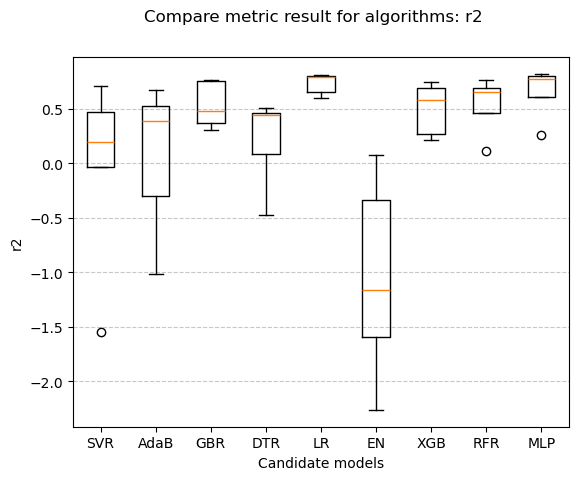

####### Evaluation metric:  neg_root_mean_squared_error

Training model: SVR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: SVR, neg_root_mean_squared_error Mean: -43.3005, Std: 28.7652


Training model: AdaB with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: AdaB, neg_root_mean_squared_error Mean: -36.1058, Std: 7.6387


Training model: GBR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: GBR, neg_root_mean_squared_error Mean: -27.9272, Std: 9.1035


Training model: DTR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: DTR, neg_root_mean_squared_error Mean: -35.5354, Std: 7.3187


Training model: LR with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...
Model: LR, neg_root_mean_squared_error Mean: -22.1378, Std: 8.9425


Training model: EN with neg_root_mean_squared_error...
Performing TimeSeriesSplit with 5 folds...

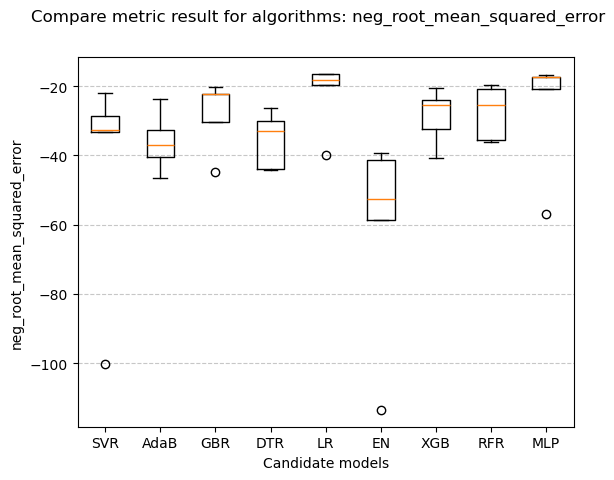

In [53]:
# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('####### Evaluation metric: ', scoring)
    
    for name, model in models:
        print(f'\nTraining model: {name} with {scoring}...')
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        
        # Start the cross-validation process and print verbose output
        print(f"Performing TimeSeriesSplit with {num_folds} folds...")
        
        cv_results = cross_val_score(model, X_train_scaled, y_train, cv=cross_validation, scoring=scoring) #treniranje 
        
        print(f"Model: {name}, {scoring} Mean: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}\n")

        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    # Show a grid for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

    results = []

### Random forest

In [54]:
Random_forest = RandomForestRegressor(n_estimators=500, max_depth=None)
Random_forest.fit(X_train_scaled,y_train)
y_predict_rf = Random_forest.predict(X_test_scaled)

In [55]:
# Create the figure
fig = go.Figure()

# Add the trace for the actual consumption (True Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='True Values',
                         line=dict(color='cyan', width=2)))  

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_rf, mode='lines', name='Predicted Values V1',
                         line=dict(color='orange', width=2, dash='dot')))  

# Update layout for a darker plot
fig.update_layout(
    title='True vs Predicted Electricity Price',
    xaxis_title='Date/Time',
    yaxis_title='PRICE (Euro/kWh)',
    template='plotly_dark',  # Dark theme
    hovermode='x unified',  # hover over to show values for both lines at a time
    legend=dict(
        x=0.01, y=0.99,  # position of legend
        traceorder='normal',
        font=dict(family="Arial", size=12, color="white"),  # Legend text white
        bgcolor='rgba(50, 50, 50, 0.5)',  # Slightly transparent dark grey
        bordercolor='white',
        borderwidth=1
    ),
)

# Show the plot
fig.show()

In [56]:
joblib.dump(Random_forest, 'Electricity_price_prediction_RF.joblib')

['Electricity_price_prediction_RF.joblib']

### XG Boost

In [57]:
XGB = XGBRegressor(n_estimators=500, max_depth=None)
XGB.fit(X_train_scaled,y_train)
y_predict_xgb = XGB.predict(X_test_scaled)

In [58]:
# Create the figure
fig = go.Figure()

# Add the trace for the actual consumption (True Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='True Values',
                         line=dict(color='cyan', width=2)))  

# Add the trace for the predicted consumption (Predicted Values)
fig.add_trace(go.Scatter(x=y_test.index, y=y_predict_xgb, mode='lines', name='Predicted Values V1',
                         line=dict(color='orange', width=2, dash='dot')))  

# Update layout for a darker plot
fig.update_layout(
    title='True vs Predicted Electricity Price',
    xaxis_title='Date/Time',
    yaxis_title='PRICE (Euro/kWh)',
    template='plotly_dark',  # Dark theme
    hovermode='x unified',  # hover over to show values for both lines at a time
    legend=dict(
        x=0.01, y=0.99,  # position of legend
        traceorder='normal',
        font=dict(family="Arial", size=12, color="white"),  # Legend text white
        bgcolor='rgba(50, 50, 50, 0.5)',  # Slightly transparent dark grey
        bordercolor='white',
        borderwidth=1
    ),
)

# Show the plot
fig.show()

In [59]:
joblib.dump(XGB, 'Electricity_price_prediction_XGB.joblib')

['Electricity_price_prediction_XGB.joblib']

### Linear regression

In [60]:
linear_regression = LinearRegression(fit_intercept=False, positive=False)

# Fit the model to the training data
linear_regression.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_predict_lr = linear_regression.predict(X_test_scaled)

In [61]:
joblib.dump(linear_regression, 'Electricity_price_prediction_LR.joblib')

['Electricity_price_prediction_LR.joblib']